# Lesson 26 - Interpreting Principal Components


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Example 1: Credit Scores

A data frame with 10000 observations on the following 12 variables.

* **ID** Identification

* **Income** Income in $10,000's

* **Limit** Credit limit

* **Rating** Credit rating

* **Cards** Number of credit cards

* **Age** Age in years

* **Education** Number of years of education

* **Gender** A factor with levels Male and Female

* **Student** A factor with levels No and Yes indicating whether the individual was a student

* **Married** A factor with levels No and Yes indicating whether the individual was married

* **Ethnicity** A factor with levels African American, Asian, and Caucasian indicating the individual's ethnicity

* **Balance** Average credit card balance in $.

In [14]:
df_credit = pd.read_table(filepath_or_buffer='Data/credit.csv', sep=',')
df_credit.head(n=5)

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [15]:
X_credit = df_credit.iloc[:, [1,2,3,4,5,6,11]]
print(X_credit.shape)

(400, 7)


In [16]:
scaler = StandardScaler()
scaler.fit(X_credit.astype('float'))
X_credit_scaled = scaler.transform(X_credit.astype('float'))
pd.DataFrame(X_credit_scaled).describe()

,0,1,2,3,4,5,6
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,1.729172e-16,-1.584843e-16,9.159340e-18,6.161738e-17,1.830480e-16,2.142730e-16,1.915135e-17
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-9.904743e-01,-1.683330e+00,-1.695069e+00,-1.429291e+00,-1.896161e+00,-2.707207e+00,-1.132477e+00
25%,-6.878268e-01,-7.146973e-01,-6.968846e-01,-6.991298e-01,-8.078311e-01,-7.849299e-01,-9.827546e-01
50%,-3.438443e-01,-4.906061e-02,-7.079503e-02,3.103187e-02,1.929972e-02,1.762088e-01,-1.317882e-01
75%,3.480625e-01,4.932738e-01,5.326453e-01,7.611935e-01,8.319194e-01,8.169679e-01,7.469449e-01
max,4.017453e+00,3.980980e+00,4.057837e+00,4.412002e+00,2.457159e+00,2.098486e+00,3.220900e+00


In [17]:
pca_credit = PCA(n_components=7)
Z_credit = pca_credit.fit_transform(X_credit_scaled)

pc_credit = np.round(pca_credit.components_, 2)

pc_credit_df = pd.DataFrame(pc_credit, columns=X_credit.columns).transpose()
pc_credit_df

,0,1,2,3,4,5,6
Income,0.45,-0.03,-0.15,-0.13,0.74,0.46,-0.00
Limit,0.54,-0.05,0.04,-0.01,-0.03,-0.46,-0.70
Rating,0.54,-0.01,0.04,0.02,-0.03,-0.46,0.71
Cards,0.03,0.74,0.08,0.65,0.16,-0.02,-0.03
Age,0.08,0.31,-0.90,-0.18,-0.26,0.01,-0.00
Education,-0.02,-0.60,-0.36,0.71,0.05,-0.01,0.00
Balance,0.47,-0.02,0.19,0.14,-0.60,0.61,-0.00


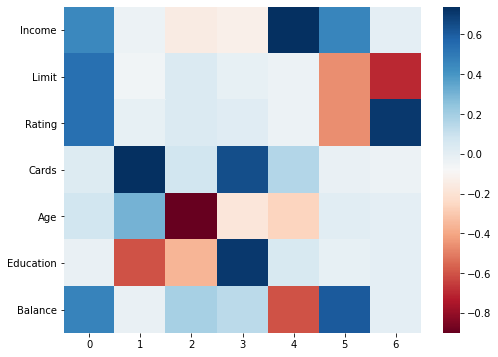

In [18]:
plt.figure(figsize = [8,6])
sns.heatmap(pc_credit_df, cmap = 'RdBu')
plt.show()

In [7]:
print(np.round(pca_credit.explained_variance_ratio_,2))

[0.49 0.15 0.15 0.14 0.07 0.01 0.  ]


## Example 2: U.S. News and World Report's College Data

Statistics for a large number of US Colleges from the 1995 issue of US News and World Report. Contains  777 observations on the following 18 variables.

* **Private** A factor with levels No and Yes indicating private or public university

* **Apps** Number of applications received

* **Accept** Number of applications accepted

* **Enroll** Number of new students enrolled

* **Top10perc** Pct. new students from top 10% of H.S. class

* **Top25perc** Pct. new students from top 25% of H.S. class

* **F.Undergrad** Number of fulltime undergraduates

* **P.Undergrad** Number of parttime undergraduates

* **Outstate** Out-of-state tuition

* **Room.Board** Room and board costs

* **Books** Estimated book costs

* **Personal** Estimated personal spending

* **PhD** Pct. of faculty with Ph.D.'s

* **Terminal** Pct. of faculty with terminal degree

* **S.F.Ratio** Student/faculty ratio

* **perc.alumni** Pct. alumni who donate

* **Expend** Instructional expenditure per student

* **Grad.Rate** Graduation rate

In [19]:
df_colleges = pd.read_table(filepath_or_buffer='Data/college.csv', sep=',')
df_colleges.head(n=5)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [20]:
X_colleges = df_colleges.iloc[:, 1:]
print(X_colleges.shape)

(777, 17)


In [21]:
scaler = StandardScaler()
scaler.fit(X_colleges.astype('float'))
X_colleges_scaled = scaler.transform(X_colleges.astype('float'))
pd.DataFrame(X_colleges_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02
mean,6.355797e-17,6.774575e-17,-5.249269e-17,-2.753232e-17,-1.546739e-16,-1.661405e-16,-3.029180e-17,6.515595e-17,3.570717e-16,-2.192583e-16,4.765243e-17,5.954768e-17,-4.481615e-16,-2.057556e-17,-6.022638e-17,1.213101e-16,3.886495e-16
std,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00
min,-7.551337e-01,-7.947645e-01,-8.022728e-01,-1.506526e+00,-2.364419e+00,-7.346169e-01,-5.615022e-01,-2.014878e+00,-2.351778e+00,-2.747779e+00,-1.611860e+00,-3.962596e+00,-3.785982e+00,-2.929799e+00,-1.836580e+00,-1.240641e+00,-3.230876e+00
25%,-5.754408e-01,-5.775805e-01,-5.793514e-01,-7.123803e-01,-7.476067e-01,-5.586426e-01,-4.997191e-01,-7.762035e-01,-6.939170e-01,-4.810994e-01,-7.251203e-01,-6.532948e-01,-5.915023e-01,-6.546598e-01,-7.868237e-01,-5.574826e-01,-7.260193e-01
50%,-3.732540e-01,-3.710108e-01,-3.725836e-01,-2.585828e-01,-9.077663e-02,-4.111378e-01,-3.301442e-01,-1.120949e-01,-1.437297e-01,-2.992802e-01,-2.078552e-01,1.433889e-01,1.561419e-01,-1.237939e-01,-1.408197e-01,-2.458933e-01,-2.698956e-02
75%,1.609122e-01,1.654173e-01,1.314128e-01,4.221134e-01,6.671042e-01,6.294077e-02,7.341765e-02,6.179271e-01,6.318245e-01,3.067838e-01,5.310950e-01,7.562224e-01,8.358184e-01,6.093067e-01,6.666852e-01,2.241735e-01,7.302926e-01
max,1.165867e+01,9.924816e+00,6.043678e+00,3.882319e+00,2.233391e+00,5.764674e+00,1.378992e+01,2.800531e+00,3.436593e+00,1.085230e+01,8.068387e+00,1.859323e+00,1.379560e+00,6.499390e+00,3.331452e+00,8.924721e+00,3.060392e+00


In [22]:
pca_colleges = PCA(n_components=17)
Z_colleges = pca_colleges.fit_transform(X_colleges_scaled)

pc_colleges = np.round(pca_colleges.components_,2)

pc_colleges_df = pd.DataFrame(pc_colleges, columns=X_colleges.columns).transpose()
pc_colleges_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Apps,0.25,0.33,-0.06,0.28,0.01,-0.02,-0.04,-0.10,-0.09,0.05,0.04,0.02,0.60,0.08,0.13,0.46,0.36
Accept,0.21,0.37,-0.10,0.27,0.06,0.01,-0.01,-0.06,-0.18,0.04,-0.06,-0.15,0.29,0.03,-0.15,-0.52,-0.54
Enroll,0.18,0.40,-0.08,0.16,-0.06,-0.04,-0.03,0.06,-0.13,0.03,-0.07,0.01,-0.44,-0.09,0.03,-0.40,0.61
Top10perc,0.35,-0.08,0.04,-0.05,-0.40,-0.05,-0.16,-0.12,0.34,0.06,-0.01,0.04,0.00,-0.11,0.70,-0.15,-0.14
Top25perc,0.34,-0.04,-0.02,-0.11,-0.43,0.03,-0.12,-0.10,0.40,0.01,-0.27,-0.09,0.02,0.15,-0.62,0.05,0.08
F.Undergrad,0.15,0.42,-0.06,0.10,-0.04,-0.04,-0.03,0.08,-0.06,0.02,-0.08,0.06,-0.52,-0.06,0.01,0.56,-0.41
P.Undergrad,0.03,0.32,0.14,-0.16,0.30,-0.19,0.06,0.57,0.56,-0.22,0.10,-0.06,0.13,0.02,0.02,-0.05,0.01
Outstate,0.29,-0.25,0.05,0.13,0.22,-0.03,0.11,0.01,-0.00,0.19,0.14,-0.82,-0.14,-0.03,0.04,0.10,0.05
Room.Board,0.25,-0.14,0.15,0.18,0.56,0.16,0.21,-0.22,0.28,0.30,-0.36,0.35,-0.07,-0.06,0.00,-0.03,0.00
Books,0.06,0.06,0.68,0.09,-0.13,0.64,-0.15,0.21,-0.13,-0.08,0.03,-0.03,0.01,-0.07,-0.01,0.00,0.00


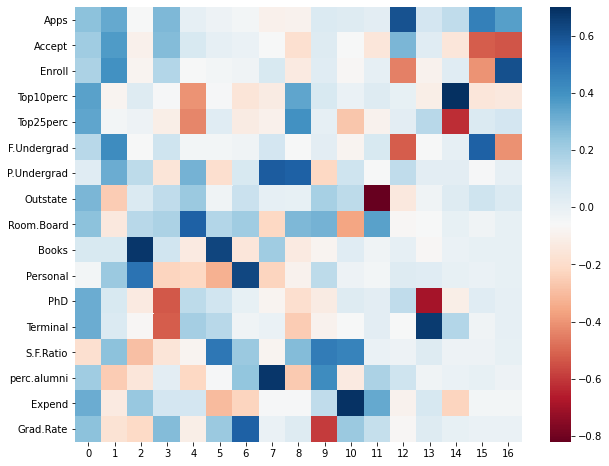

In [23]:
#df = pd.DataFrame(np.random.random((5,5)), columns=["a","b","c","d","e"])

plt.figure(figsize = [10,8])
sns.heatmap(pc_colleges_df, cmap = 'RdBu')
plt.show()

In [24]:
print(np.round(pca_colleges.explained_variance_ratio_,2))

[0.32 0.26 0.07 0.06 0.05 0.05 0.04 0.03 0.03 0.02 0.02 0.01 0.01 0.01
 0.01 0.   0.  ]


In [26]:
print(df_colleges.loc['University of Missouri at Rolla',:])
#print(df_colleges.loc['Harvard University',:])

Private          No
Apps           1877
Accept         1826
Enroll          823
Top10perc        49
Top25perc        77
F.Undergrad    3926
P.Undergrad     561
Outstate       9057
Room.Board     3600
Books           700
Personal       1435
PhD              88
Terminal         88
S.F.Ratio      14.4
perc.alumni      23
Expend         9699
Grad.Rate        49
Name: University of Missouri at Rolla, dtype: object


In [27]:
df_colleges.index.get_loc('Harvard University')

250

In [28]:
print(Z_colleges[250,:])

[ 7.69419904 -1.24192041  0.79279617  0.79258425 -0.97045821 -1.83658638
  0.41618569 -0.44601985  0.31523839  1.32735077  2.22479445  1.52048224
  0.33024333  0.04131785  0.37979928  0.81611647  0.78531243]


## Example 3: Rand McNally Places Rated Data

The data is taken from the Places Rated Almanac, by Richard Boyer and David Savageau, copyrighted and published by Rand McNally. The nine rating criteria used by Places Rated Almanac are:

* Climate & Terrain

* Housing

* Health Care & Environment

* Crime

* Transportation

* Education

* The Arts

* Recreation

* Economics

For all but two of the above criteria, the higher the score, the better. For Housing and Crime, the lower the score the better.

In [35]:
df_places = pd.read_table(filepath_or_buffer='Data/places.txt', sep='\t')
df_places.set_index('City', inplace=True)
df_places.index.name = None
df_places.head(n=10)

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ,CaseNum,Long,Lat,Pop,StNum
"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633,1,-99.6890,32.5590,110932,44
"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350,2,-81.5180,41.0850,660328,36
"Albany,GA",468,7339,618,970,2531,2560,237,859,5250,3,-84.1580,31.5750,112402,11
"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864,4,-73.7983,42.7327,835880,35
"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727,5,-106.6500,35.0830,419700,33
"Alexandria,LA",520,5819,640,727,2444,2972,334,1018,5254,6,-92.4530,31.3020,135282,19
"Allentown,Bethlehem,PA-NJ",559,8288,621,514,2881,3144,2333,1117,5097,7,-75.4405,40.6155,635481,39
"Alton,Granite-City,IL",537,6487,965,706,4975,2945,1487,1280,5795,8,-90.1615,38.7940,268229,15
"Altoona,PA",561,6191,432,399,4246,2778,256,1210,4230,9,-78.3950,40.5150,136621,39
"Amarillo,TX",609,6546,669,1073,4902,2852,1235,1109,6241,10,-101.8490,35.3830,173699,44


In [36]:
X_places = df_places.iloc[:,[0,1,2,3,4,5,6,7,8]]
print(X_places.shape)

(329, 9)


In [37]:
scaler = StandardScaler()
scaler.fit(X_places.astype('float'))
X_places_scaled = scaler.transform(X_places.astype('float'))
pd.DataFrame(X_places_scaled).describe()

,0,1,2,3,4,5,6,7,8
count,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02
mean,1.737887e-16,3.306204e-16,8.773799e-18,1.936985e-16,-2.817739e-16,2.368926e-16,-1.012361e-18,-6.749076e-18,-3.799730e-16
std,1.001523e+00,1.001523e+00,1.001523e+00,1.001523e+00,1.001523e+00,1.001523e+00,1.001523e+00,1.001523e+00,1.001523e+00
min,-3.595724e+00,-1.338391e+00,-1.141054e+00,-1.831280e+00,-2.115349e+00,-3.477583e+00,-6.685513e-01,-1.916493e+00,-2.290655e+00
25%,-4.869037e-01,-6.661639e-01,-6.018499e-01,-7.124141e-01,-7.378210e-01,-6.115656e-01,-5.119245e-01,-6.569779e-01,-6.310978e-01
50%,2.708800e-02,-1.971584e-01,-3.522185e-01,-3.941189e-02,-8.977541e-02,-6.521139e-02,-2.761214e-01,-2.181310e-01,-1.305525e-01
75%,4.415974e-01,2.806647e-01,2.588791e-01,5.466609e-01,6.866370e-01,6.153898e-01,1.495323e-01,4.091473e-01,5.426901e-01
max,3.077877e+00,6.421405e+00,6.654436e+00,4.309865e+00,3.046931e+00,3.016226e+00,1.156236e+01,3.662069e+00,4.113924e+00


In [38]:
pca_places = PCA(n_components=9)
Z_places = pca_places.fit_transform(X_places_scaled)

pc_places = np.round(pca_places.components_,3)

pc_places_df = pd.DataFrame(pc_places, columns=X_places.columns).transpose()
pc_places_df

,0,1,2,3,4,5,6,7,8
Climate,0.206,0.218,0.690,0.137,-0.369,-0.375,-0.085,-0.362,0.001
HousingCost,0.357,0.251,0.208,0.512,0.233,0.142,-0.231,0.614,0.014
HlthCare,0.460,-0.299,0.007,0.015,-0.103,0.374,0.014,-0.186,-0.716
Crime,0.281,0.355,-0.185,-0.539,-0.524,-0.081,0.019,0.430,-0.059
Transp,0.351,-0.180,-0.146,-0.303,0.404,-0.468,-0.583,-0.094,0.004
Educ,0.275,-0.483,-0.230,0.335,-0.209,-0.502,0.426,0.189,0.111
Arts,0.463,-0.195,0.026,-0.101,-0.105,0.462,-0.022,-0.204,0.686
Recreat,0.328,0.384,0.051,-0.190,0.530,-0.090,0.628,-0.151,-0.026
Econ,0.135,0.471,-0.607,0.422,-0.160,-0.033,-0.150,-0.405,0.000


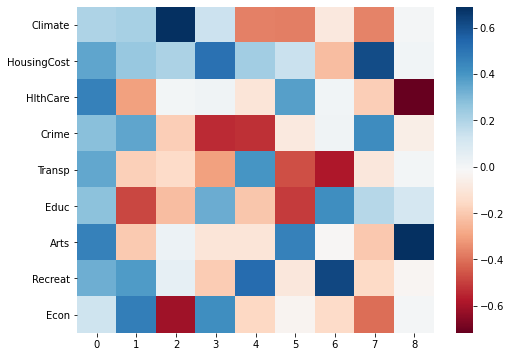

In [39]:
plt.figure(figsize = [8,6])
sns.heatmap(pc_places_df, cmap = 'RdBu')
plt.show()

In [40]:
print(np.round(pca_places.explained_variance_ratio_,2))

[0.38 0.13 0.13 0.1  0.08 0.07 0.05 0.04 0.01]


In [41]:
df_places.index.get_loc('St.-Louis,MO-IL')

261

In [42]:
print(Z_places[261,:])

[ 3.01215474 -1.60752687 -1.14447639 -0.62931814 -0.31031828 -1.03565276
  0.13875249 -0.27484785 -0.15912399]
